# 📌 K-Means Clustering

## 🔹 What is K-Means?

K-Means is an **unsupervised machine learning algorithm** used for clustering data into **K groups** based on similarity.

It groups data points so that:
- Points in the same cluster are similar
- Points in different clusters are different
---

## 🔹 Advantages

✔ Simple to understand  
✔ Fast for large datasets  
✔ Easy to implement  

---

## 🔹 Disadvantages

❌ Must choose K manually  
❌ Sensitive to outliers  
❌ Works poorly with non-spherical clusters  


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [4]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [5]:
X.shape

(1000, 2)

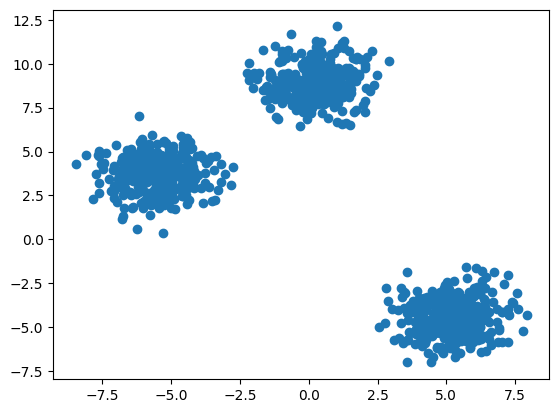

In [8]:
plt.scatter(X[:, 0], X[:,1])

In [9]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [10]:
from sklearn.cluster import  KMeans

### `Manual Process`

In [ ]:
# Elbow Method to select the K value

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1183.7803143134092,
 991.8899785187883,
 902.6885330988758,
 767.84652406542,
 710.0129061647189,
 640.2666876403462,
 556.2879826295258]

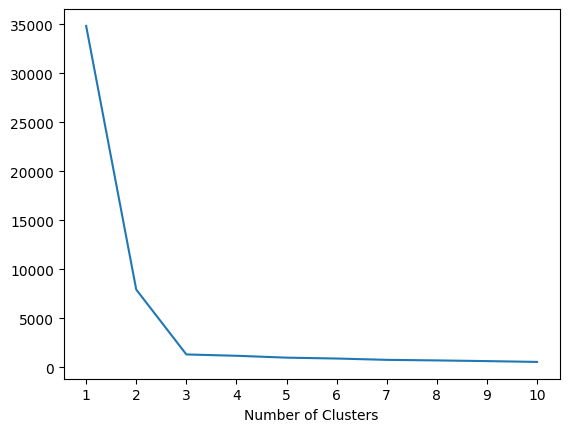

In [13]:
# Making elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [16]:
y_labels = kmeans.fit_predict(X_train)

In [20]:
y_test_label = kmeans.predict(X_test)

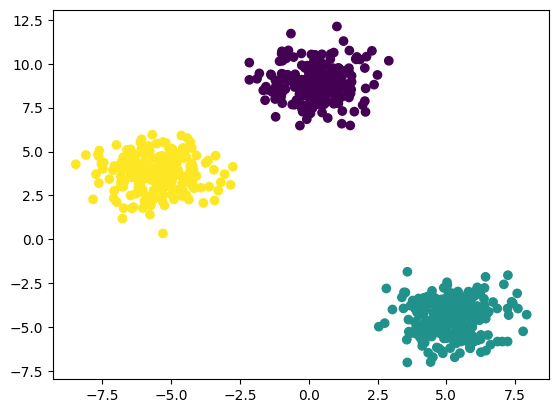

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

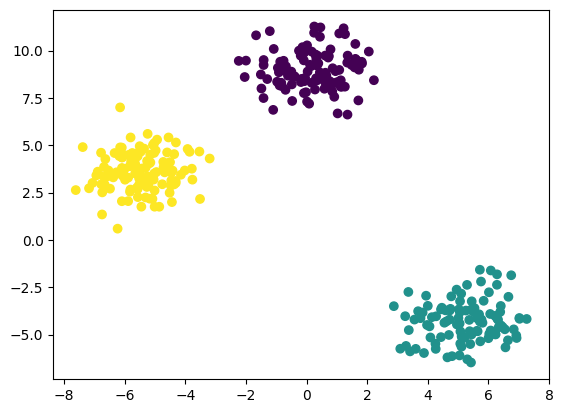

In [21]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_label)

### `Automatically find K value`

In [23]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


In [25]:
from kneed import KneeLocator

In [27]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [28]:
kl.elbow

np.int64(3)

## performance metrics

In [29]:
# Silhoutte score
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [33]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4763485724139249,
 0.3357985326210192,
 0.3256067933255896,
 0.34198771347684687,
 0.3369902079193647,
 0.32598755111370503]

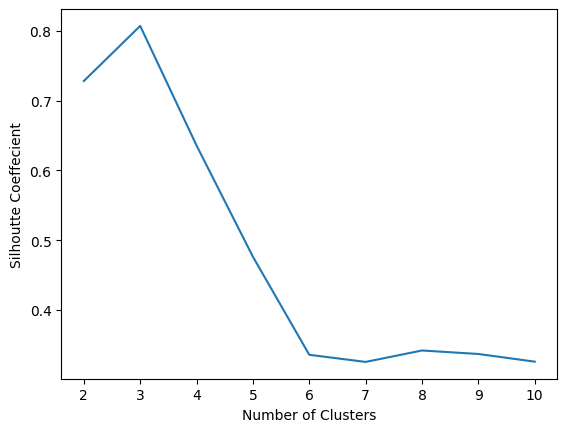

In [34]:
# plotting silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel("Silhoutte Coeffecient")
plt.show()